In [ ]:
#Computer Simulation, Computational Methods, Assignment 2

name = "Rohan Kadam"
Student_number = "20334092"
print(name, Student_number)

Rohan Kadam 20334092


In [ ]:
#lets import libraries needed
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize
plt.rcParams.update({
    "font.size": 16,
})

<ipython-input-12-a97cde085145>:17: RuntimeWarning: overflow encountered in exp
  fw = (exp((w-mu)/(KB*T))+1)**(-1)
<ipython-input-12-a97cde085145>:17: RuntimeWarning: overflow encountered in exp
  fw = (exp((w-mu)/(KB*T))+1)**(-1)
C:\Users\kadams\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


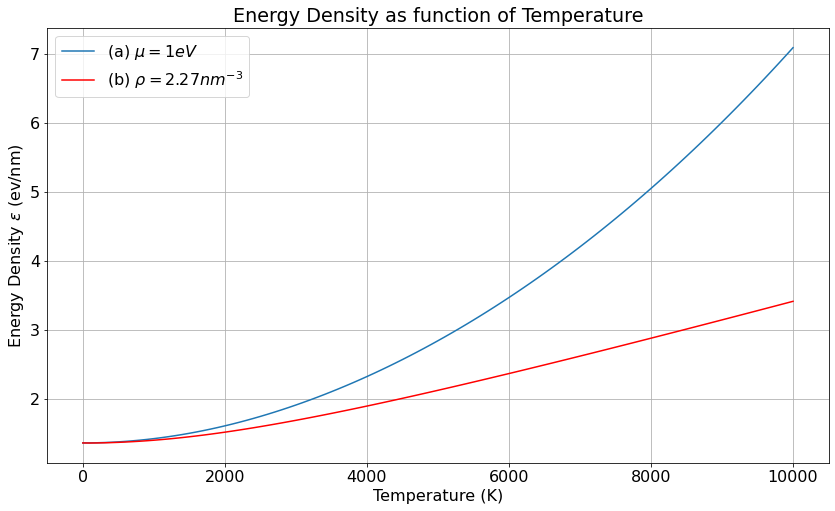

In [ ]:
#Exercise1
#lets define all constants we'll need 
pi = np.pi
inf = np.inf
sqrt = np.sqrt
exp = np.exp
KB = 8.62*10**-5
h = 0.276
T = np.linspace(0.0001,10**4+0.0001,101)
#average electron density will be p
#average energy density will be e

#lets define all the functions we will need now


def FermiDirac(w,T,mu):
    fw = (exp((w-mu)/(KB*T))+1)**(-1)
    return fw
def DensityOS(w):
    dw = sqrt(w)/(sqrt(2)*pi**2*h**3)
    return dw
def e(T,mu):
    result, err = integrate.quad(lambda w: w*DensityOS(w)*FermiDirac(w,T,mu), 0, inf)
    return result
def p(T,mu):
    result, err = integrate.quad(lambda w: DensityOS(w)*FermiDirac(w,T,mu), 0, inf)
    return result

#we want to subtract integral from other to make zero and use optimize function to solve for roots

def muroot(T,mu):
    return (p(T,mu) - 2.27)
#lets plot first line

eden1 = [0]*len(T)
index = 0
for a in T:
    eden1[index] = e(a,1.0)
    index += 1
    
plt.figure(1,figsize=(14,8))
plt.plot(T,eden1)
plt.xlabel('Temperature (K)')
plt.ylabel('Energy Density $\epsilon$ (ev/nm)')
plt.title('Energy Density as function of Temperature')
plt.grid()

eden2 = [0]*len(T)

def finding_mu(T):
    f = lambda mu: muroot(T,mu)
    root = optimize.fsolve(f, 0)
    return root[0]
mu_list = []
for t in T:
    mu_list.append(finding_mu(t))
    
for i in range(len(T)):
    eden2[i] = e(T[i],mu_list[i])
    
plt.plot(T,eden2, 'r')
plt.legend(['(a) $\\mu = 1 eV$', '(b) $\\rho = 2.27 nm^{-3}$'])

In [ ]:
# in this question we are concerned with the 1D tight binding model defined by a given Hamiltonian
# we want to first find eigen values for the alphas given
# lets define the variables we need
L = 500
tun = 1.
alpha = [1,1/2,1/3]
delw = h*tun/10
u = 2*h*tun
cos = np.cos
sin = np.sin

#lets define the onset energy given in the formula
def el(alpha,l):
    return u*cos(2*pi*alpha*l)

def mAAH(alpha,L,tun):
    values = -tun*h*np.ones(L-1)
    H = np.diag(values,1) + np.diag(values,-1)
    l_list = np.arange(0,L)
    for l in l_list:
        H[l,l] = el(alpha,l)
    return H

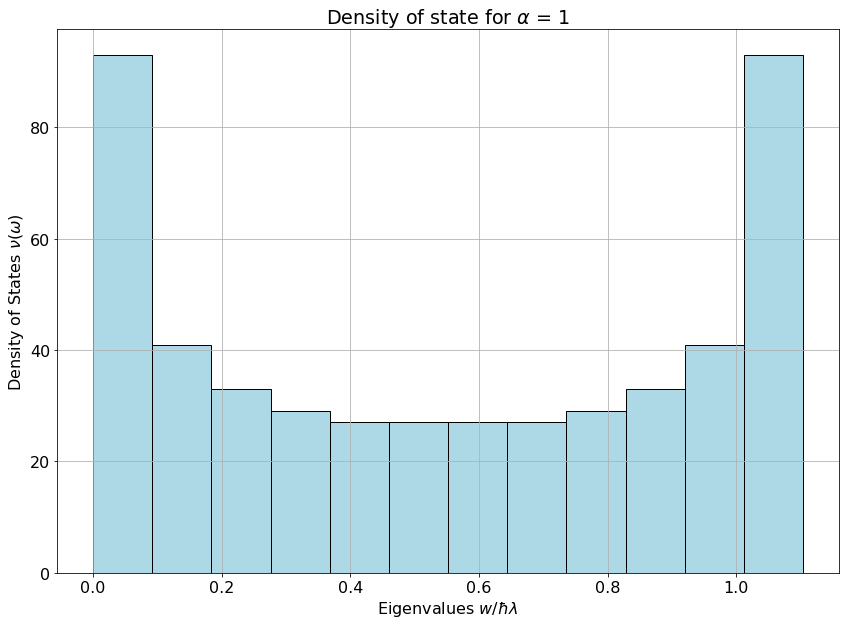

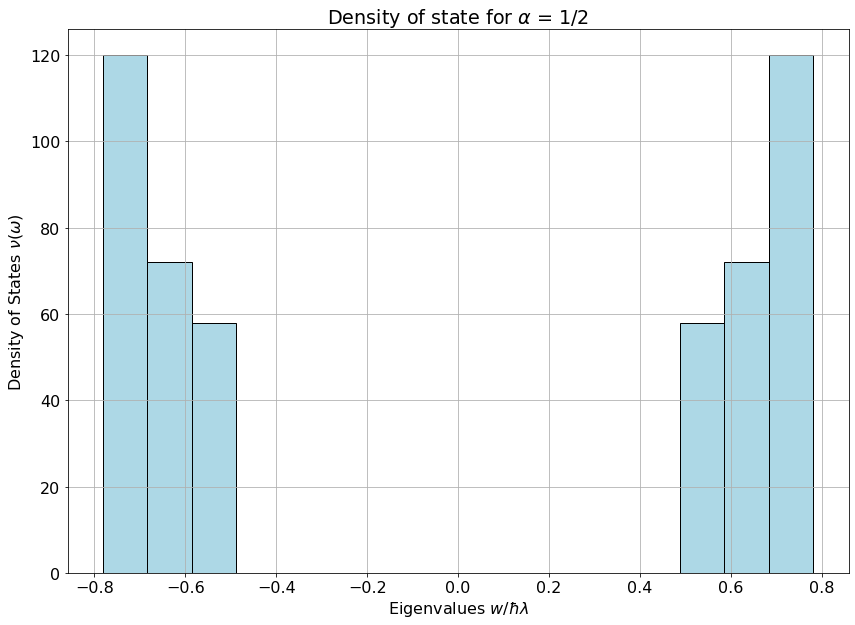

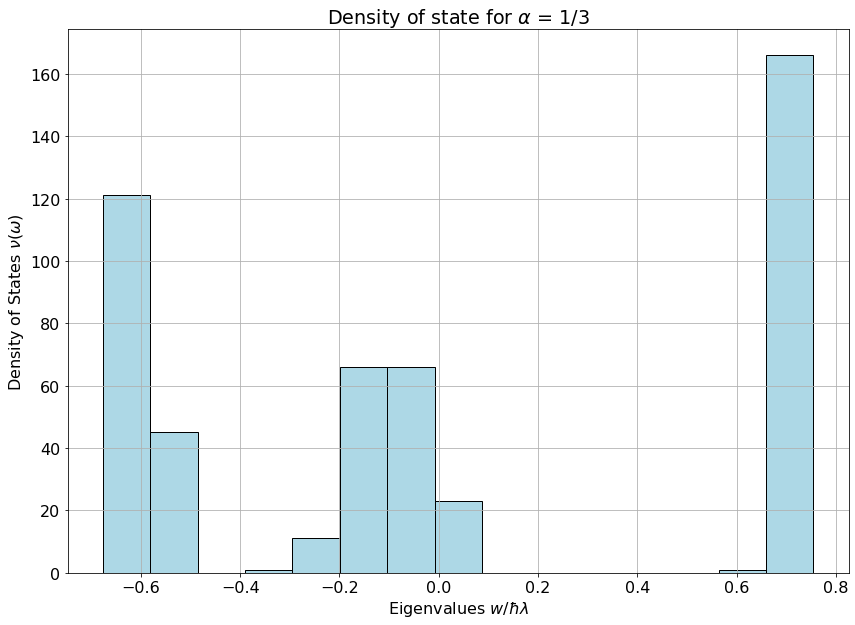

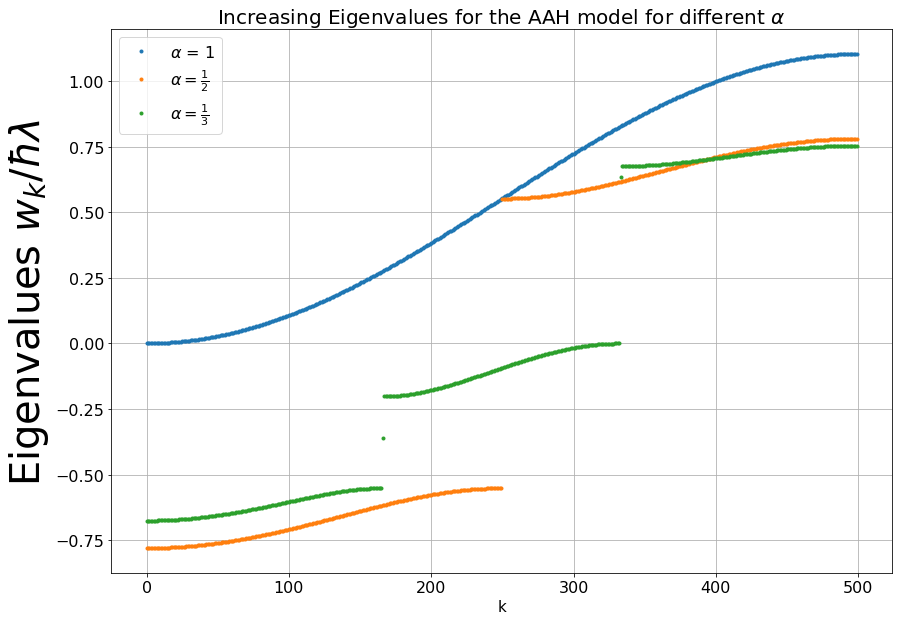

In [ ]:
plt.figure(1,figsize=(14,10))
plt.title('Increasing Eigenvalues for the AAH model for different $\\alpha$',fontsize = 20)
plt.xlabel('k',fontsize = 15)
plt.ylabel('Eigenvalues $w_k/\hbar\lambda$',fontsize = 40)
plt.grid()

plt.figure(2,figsize=(14,10))
plt.title('Density of state for $\\alpha$ = 1')
plt.xlabel('Eigenvalues $w/\hbar\lambda$')
plt.ylabel('Density of States $\\nu$($\\omega$)')
plt.grid()

plt.figure(3,figsize=(14,10))
plt.title('Density of state for $\\alpha$ = 1/2')
plt.xlabel('Eigenvalues $w/\hbar\lambda$')
plt.ylabel('Density of States $\\nu$($\\omega$)')
plt.grid()

plt.figure(4,figsize=(14,10))
plt.title('Density of state for $\\alpha$ = 1/3')
plt.xlabel('Eigenvalues $w/\hbar\lambda$')
plt.ylabel('Density of States $\\nu$($\\omega$)')
plt.grid()

N=2
for a in alpha:
    H = mAAH(a,L,tun)
    [w,psi] = np.linalg.eig(H)
    w.sort()
    plt.figure(1)
    plt.plot(w, marker = '.', linestyle = '')
    dw = tun/10
    n_bins = int((max(w)-min(w))/dw)+1
    
    plt.figure(N)
    plt.hist(w, bins=n_bins, color='lightblue', ec='k')
    
    N+=1

plt.figure(1,figsize=(14,10))
plt.legend([f'$\\alpha$ = {alpha[0]}','$\\alpha = \\frac{1}{2}$','$\\alpha = \\frac{1}{3}$'])

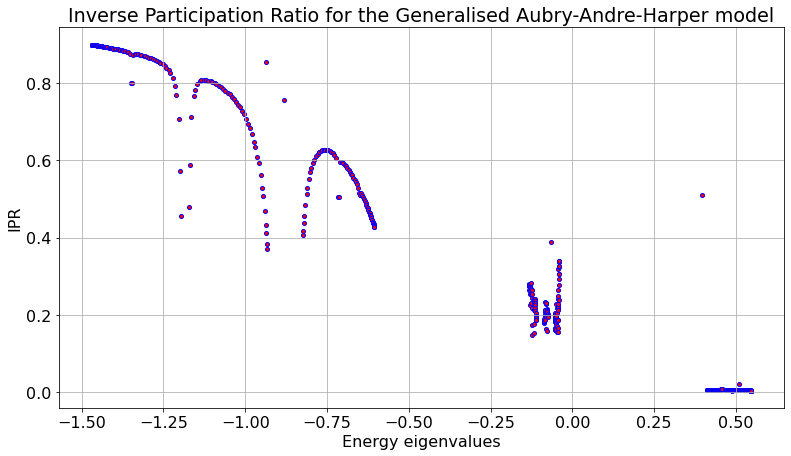

In [ ]:
#exercise 3 concerns itself with the The generalised Aubry-Andre-Harper (GAAH) model. We want to find the IPR for each eigenstate given certain parameters
# lets specify the parameters again

beta = 0.6
u = 2*h*tun
alpha = (1+sqrt(5))/2

def el(alpha,beta,l):
    return (u*cos(2*pi*alpha*l))/(1+beta*cos(2*pi*alpha*l))

def mGAAH(alpha,beta,L,tun):
    values = -tun*h*np.ones(L-1)
    H = np.diag(values,1) + np.diag(values,-1)
    l_list = np.arange(0,L)
    for l in l_list:
        H[l,l] = el(alpha,beta,l)
    return H

def IPR(x):
    return sum(np.abs(x)**4)
H = mGAAH(alpha,beta,L,tun)
[w,psi] = np.linalg.eig(H)
ind = np.argsort(w)
w = w[ind]
psi = psi[:,ind]
IPR = [IPR(psi[:,i]) for i in range(len(psi))]

plt.figure(5,figsize=(13,7))
plt.scatter(w,IPR, s=16, c='red', ec='blue')
plt.title('Inverse Participation Ratio for the Generalised Aubry-Andre-Harper model')
plt.xlabel('Energy eigenvalues')
plt.ylabel('IPR')
plt.grid()

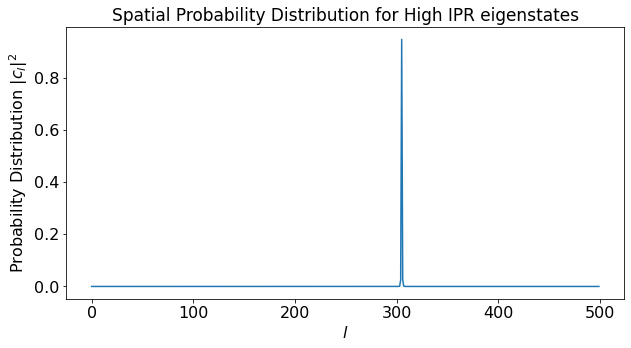

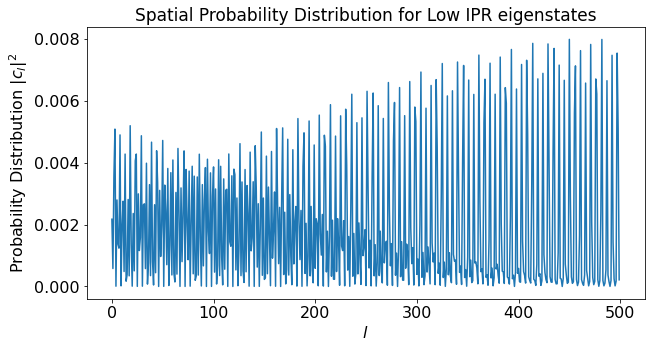

In [ ]:
#part 3b
x = max(IPR)
y = min(IPR)
High_index = IPR.index(x)
Low_index = IPR.index(y)
High_IPR = psi[:,High_index]
Low_IPR = psi[:,Low_index]
order = np.arange(0,L,1)

plt.figure(7,figsize=(10,5))
plt.plot(order,np.abs(High_IPR)**2)
plt.xlabel('$l$')
plt.ylabel('Probability Distribution $|c_l|^2$',fontsize = 16)
plt.title('Spatial Probability Distribution for High IPR eigenstates',fontsize = 17)
plt.show()

plt.figure(6,figsize=(10,5))
plt.plot(order,np.abs(Low_IPR)**2)
plt.xlabel('$l$')
plt.ylabel('Probability Distribution $|c_l|^2$',fontsize = 16)
plt.title('Spatial Probability Distribution for Low IPR eigenstates',fontsize = 17)
plt.show()

